In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import os

In [52]:
def plot_graph(graph, title, evidence=None, path='../plots/important_graphs', draw_edge_labels=False, named=False, base=False, IV_spec=False):
    IV_x = 1.3
    if IV_spec:IV_x=1.22
    n_round = 1
    font_size = 14
    # Define Node Positions so it looks nice
    node_positions = {
        'T': (1.05, 0), 'I': (1.1, 3), 'II': (1.2, 4), 'III': (1.3, 2),
        'IV': (IV_x, 0), 'V': (1.3, -2), 'VI': (1.2, -4), 'VII': (1.1, -3)
        }
    
    # Define edge colors: Tumor>Lnls: 'green', Basegraph: 'blue', additional edges: 'red'
    if not base: base = [('II', 'III'), ('III', 'IV')]
    edge_colors = {}
    for source, victim in graph.items():
        for v in victim:
            if source=='T': 
                edge_colors[(source, v)] = 'green'
            elif (source, v) in base: edge_colors[(source, v)] = 'blue'
            else: edge_colors[(source, v)] = 'red'


    # Create a directed graph
    G = nx.DiGraph()

    # Add edges to the graph
    for start_node, end_nodes in graph.items():
        for end_node in end_nodes:
            G.add_edge(start_node, end_node)
    
    # Plot the graph
    plt.figure(figsize=(4, 4))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos=node_positions, node_color='lightblue', node_size=500)
    
    
    # Draw node labels
    nx.draw_networkx_labels(G, pos=node_positions, font_size=font_size, font_weight='bold')
    
    labels = [r'$t_{I}$', r'$t_{II}$', r'$t_{III}$']
    # Draw edges with specified colors
    for (start_node, end_node), color in edge_colors.items():
        nx.draw_networkx_edges(
            G,
            width=3,
            pos=node_positions,
            edgelist=[(start_node, end_node)],
            edge_color=color,
            arrowstyle='->',
            arrowsize=20,
        )

    edge_labels = {
        ('T', 'II'): r'$b_{II}$',
        ('T', 'III'): r'$b_{III}$', 
        ('II', 'III'): r'$t_{II \rightarrow III}$'}
    
    if draw_edge_labels: nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_labels, font_size=font_size+5, font_color='black')

    
    
    if evidence: plt.title(f'Evidence: {np.round(-evidence[0], n_round)} $ \\pm $ {np.round(evidence[1], n_round)}')
    plt.axis('off')
    if named: plt.title(title, fontdict={'fontsize': 12, 'fontweight': 'bold'})
    # Save the plot
    plt.savefig(f'{path}/{title}.png', format="PNG");

In [36]:
results_root = '../graph_results'

In [ ]:
directory_path = '../graph_results/graphs'
file_names = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]


## Example Graphs including only LNLs II & III

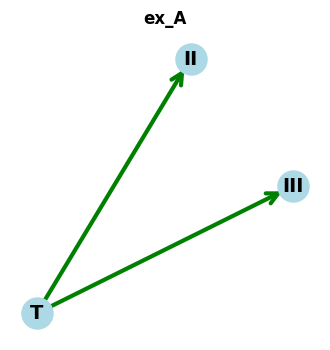

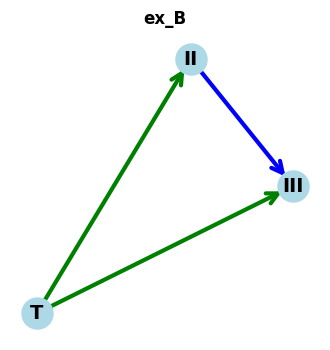

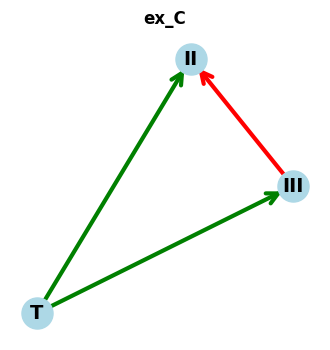

In [55]:
names = sorted([n.replace("_graph.json", "") for n in file_names if 'ex' in n])
for graph_name in names:
    with open(f'{results_root}/graphs/{graph_name}_graph.json') as f:
        graph = json.load(f)
        d = graph['lnl']
        d['T'] = graph['tumor']['primary']
        plot_graph(graph=d, title=graph_name, evidence=None, path='../plots/graphs', draw_edge_labels=False, named=True, base=False, IV_spec=False);

## Base

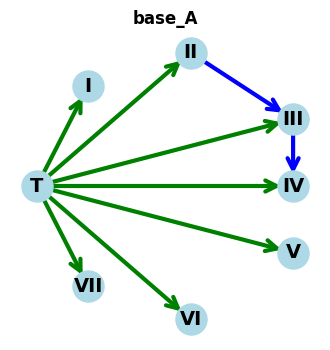

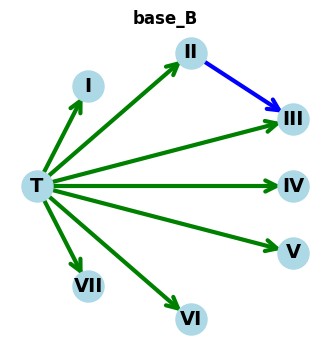

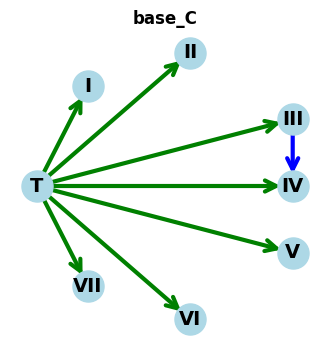

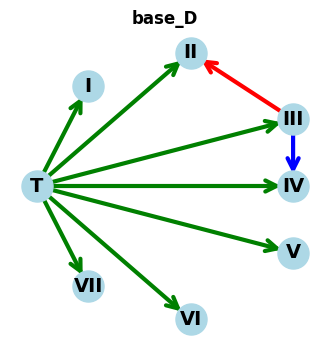

In [ ]:
base = [('II', 'III')]
names = sorted([n.replace("_graph.json", "") for n in file_names if 'base' in n])
for graph_name in names:
    with open(f'{results_root}/graphs/{graph_name}_graph.json') as f:
        graph = json.load(f)
        d = graph['lnl']
        d['T'] = graph['tumor']['primary']
        plot_graph(graph=d, title=graph_name, evidence=None, path='../plots/graphs', draw_edge_labels=False, named=True, base=base, IV_spec=False);

## Including V

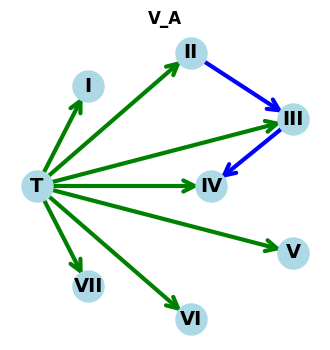

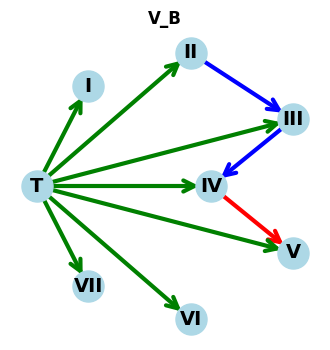

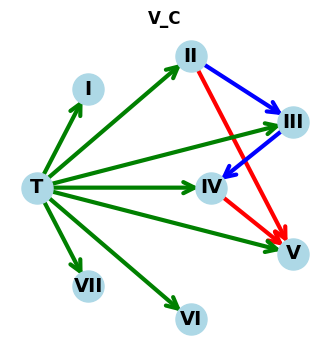

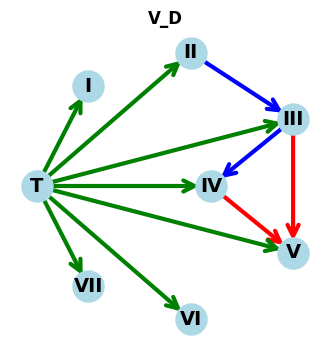

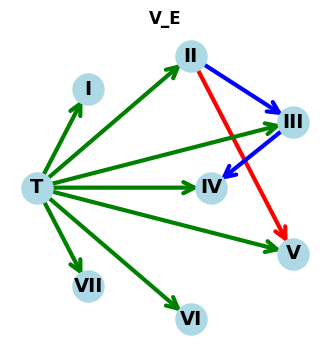

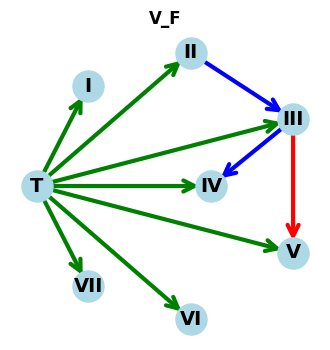

In [63]:
base = [('II', 'III'), ('III', 'IV')]

names = sorted([n.replace("_graph.json", "") for n in file_names if 'V_' in n])
for graph_name in names:
    with open(f'{results_root}/graphs/{graph_name}_graph.json') as f:
        graph = json.load(f)
        d = graph['lnl']
        d['T'] = graph['tumor']['primary']
        plot_graph(graph=d, title=graph_name, evidence=None, path='../plots/graphs', draw_edge_labels=False, named=True, base=False, IV_spec=True);

## Including I

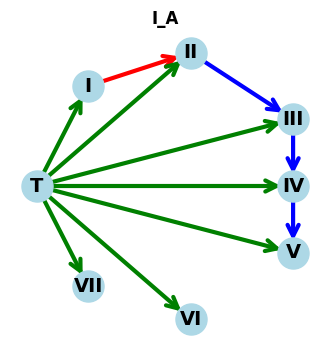

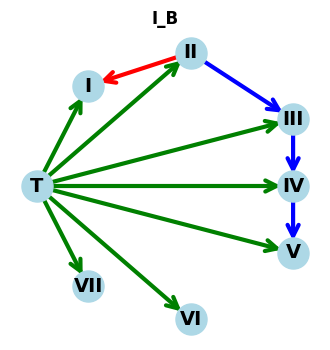

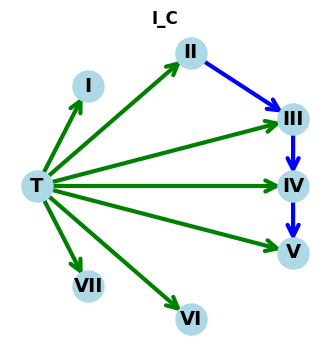

In [66]:
base = [('II', 'III'), ('III', 'IV'), ('IV', 'V')]

names = sorted([n.replace("_graph.json", "") for n in file_names if 'I_' in n and 'VI' not in n])
for graph_name in names:
    with open(f'{results_root}/graphs/{graph_name}_graph.json') as f:
        graph = json.load(f)
        d = graph['lnl']
        d['T'] = graph['tumor']['primary']
        plot_graph(graph=d, title=graph_name, evidence=None, path='../plots/graphs', draw_edge_labels=False, named=True, base=base, IV_spec=False);

## Including VI and VII

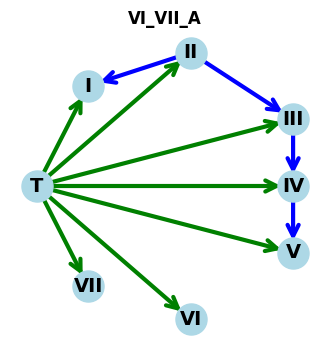

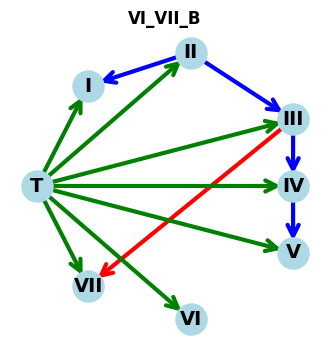

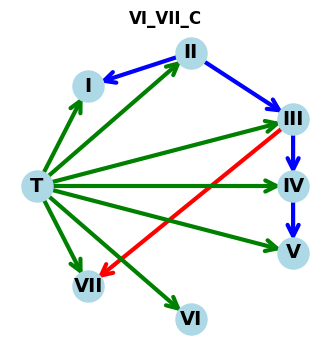

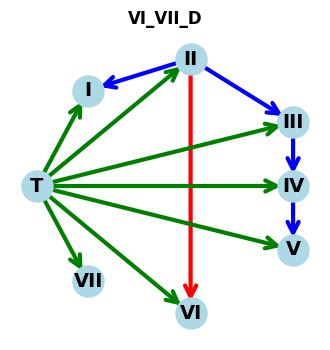

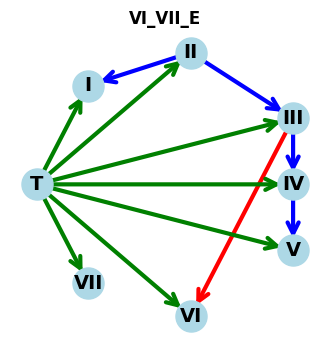

In [67]:
base = [('II', 'I'),('II', 'III'), ('III', 'IV'), ('IV', 'V')]

names = sorted([n.replace("_graph.json", "") for n in file_names if 'VII' in n])
for graph_name in names:
    with open(f'{results_root}/graphs/{graph_name}_graph.json') as f:
        graph = json.load(f)
        d = graph['lnl']
        d['T'] = graph['tumor']['primary']
        plot_graph(graph=d, title=graph_name, evidence=None, path='../plots/graphs', draw_edge_labels=False, named=True, base=base, IV_spec=False);